In [1]:
import numpy as np
import numpy.linalg as la
import scipy.linalg as spla
import matplotlib.pyplot as pt
import numpy.polynomial.chebyshev as cheby
% matplotlib inline

I will try to get a solution to the equation:

$ \ddot{u}(x) = 1; \\
\text with \space Boundary \space Conditions: \space u(-1) = 0, \space u(1) = 0 $

Its true solution is given by:
$u(x) = \frac{1}{2}x^2 - \frac{1}{2}$

Using Chebyshev Spectral Differentiation matrices.

In [6]:
n= 5

In [7]:
def GCLmesh(n):
    mesh = np.zeros(n+1)
    for j in range(0,n+1):
        xj = np.cos(j*np.pi/n)
        mesh[j] = xj
    return mesh

In [8]:
def chebyDiffMatrix(n, mesh):
	d_mat = np.zeros((n+1,n+1))
	for i in range(0,n+1):
		for j in range(0,n+1):
			if(i==0 and j==0):
				entry = (2*(n**2) + 1)/6.0
			elif(i==n and j==n):
				entry = - (2*(n**2) + 1)/6.0
			elif (i==j):
				entry = -mesh[j]/(2.0*( 1-(mesh[j]**2) ) )
			else:
				ci = 2.0 if (i==0 or i==n) else 1.0
				cj = 2.0 if (j==0 or j==n) else 1.0
				entry = (ci/cj) * ( ((-1)**(i+j)) / (mesh[i] - mesh[j]) )
			d_mat[i,j] = entry
	return d_mat

In [9]:
mesh = GCLmesh(n)
#print(mesh)

In [10]:
D = chebyDiffMatrix(n, mesh)
#print(D.round(2))

In [11]:
K = D.dot(D)
if n < 10: print(K.round(2))

[[ 41.6  -68.36  40.83 -23.64  17.57  -8.  ]
 [ 21.29 -31.53  12.68  -3.69   2.21  -0.95]
 [ -1.85   7.32 -10.07   5.79  -1.91   0.71]
 [  0.71  -1.91   5.79 -10.07   7.32  -1.85]
 [ -0.95   2.21  -3.69  12.68 -31.53  21.29]
 [ -8.    17.57 -23.64  40.83 -68.36  41.6 ]]


In [12]:
# Modification 1 (Sub system.)
K = K[1:-1, 1:-1]
if n < 10: print(K)

[[-31.53312629  12.68328157  -3.69442719   2.21114562]
 [  7.31671843 -10.06687371   5.78885438  -1.90557281]
 [ -1.90557281   5.78885438 -10.06687371   7.31671843]
 [  2.21114562  -3.69442719  12.68328157 -31.53312629]]


In [145]:
# Modification 2 (unit vectors on first and last row).
K[0,:] = 0
K[-1,:] = 0
K[0,0] = 1
K[-1,-1] = 1
#print(K)
rhs = np.ones(n+1)
rhs[0] = 0
rhs[-1] = 0

In [13]:
P,L,U = spla.lu(K)
print('P:')
print(P)
print('L:')
print(L)
print('U:')
print(U)

P:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]]
L:
[[ 1.          0.          0.          0.        ]
 [-0.23203276  1.          0.          0.        ]
 [-0.07012136  0.39375114  1.          0.        ]
 [ 0.06043082 -0.70500249 -0.60738131  1.        ]]
U:
[[-31.53312629  12.68328157  -3.69442719   2.21114562]
 [  0.          -7.12393684   4.93162623  -1.39251458]
 [  0.           0.          10.48238986 -30.82977355]
 [  0.           0.           0.         -12.5240573 ]]


In [14]:
# Sub vector of right hand sides.
rhs = np.ones(n-1)

In [15]:
num_sol = np.zeros(n+1)
num_sol[0] = 0 # Set first element of the vector to the BC1
num_sol[1:-1] = la.solve(K, rhs) # the rest pf the elements come from solving the sub-system.
num_sol[-1] = 0 # Set last element of the vector to the BC2

In [16]:
def true_sol(x):
    return(.5*(x**2) - .5)

In [25]:
gareth_us = np.loadtxt('gareth1.dat')
gareth_us

array([-0.1727458, -0.4522542, -0.4522542, -0.1727458])

In [26]:
num_sol

array([ 0.        , -0.17274575, -0.45225425, -0.45225425, -0.17274575,  0.        ])

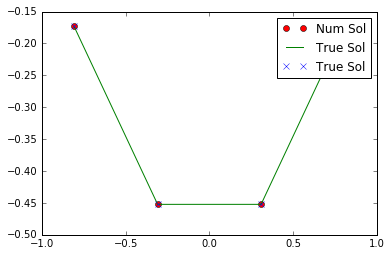

In [27]:
pt.plot(mesh[1:-1], num_sol[1:-1], 'ro', label = 'Num Sol')
pt.plot(mesh[1:-1], true_sol(mesh)[1:-1], 'g-', label = 'True Sol')
pt.plot(mesh[1:-1], gareth_us, 'bx', label = 'True Sol')
pt.legend()

Now that we have a method for computing a second order BVP with Spectral Diff matrices,
we want to solve a more general problem using fixed point iteration over this method.

The problem is as follows:

$ \ddot{u}(x) = e^{u(x)}; \\
\text with \space Boundary \space Conditions: \space u(-1) = 0, \space u(1) = 0 $

In [83]:
n = 40

In [84]:
printing = False;

In [85]:
def f(x):
    return np.exp(x)

In [86]:
mesh = GCLmesh(n)
D = chebyDiffMatrix(n, mesh)
K = D.dot(D)
if printing: 
    print('D^2')
    print(K.round(2))

In [87]:
modification1 = False
if(modification1):
    K = K[1:-1, 1:-1]
else:
    K[0,:] = 0
    K[-1,:] = 0
    K[0,0] = 1
    K[-1,-1] = 1
if printing: 
    print(" ")
    print("D^2 modified for BC's")
    print(K.round(2))

In [88]:
P,L,U = spla.lu(K)

if(printing):
    print('P:')
    print(P)
    print('L:')
    print(L.round(2))
    print('U:')
    print(U.round(2))

In [89]:
u = np.zeros(n+1)
if(printing): 
    print("Initial u:")
    print(u.round(2))
uk = u.copy()

In [90]:
while(True):    
    rhs = f(uk)
    rhs[0] = 0
    rhs[-1] = 0

    if(modification1):
        new_u = np.zeros(n+1)
        new_u[1:-1] = la.solve(K,rhs[1:-1])
    else:
        new_u = la.solve(K,rhs)

    if(la.norm(new_u - uk) <= 1e-8):
        u = new_u
        print('Found a solution')
        if(printing): print(u.round(2))
        break
    else:
        uk = new_u

Found a solution


In [91]:
cpp_xs = np.loadtxt('grid.dat')
cpp_us = np.loadtxt('gareth1.dat')

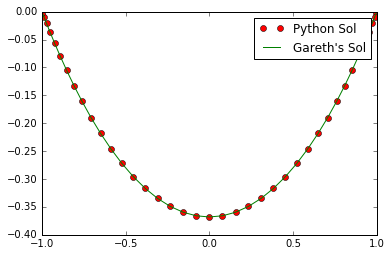

In [92]:
pt.plot(mesh[1:-1], u[1:-1], 'ro', label = 'Python Sol')
pt.plot(mesh[1:-1], cpp_us, 'g-', label = "Gareth's Sol")

pt.legend()

In [93]:
la.norm(u[1:-1] - cpp_us)

1.8591688993495873e-07